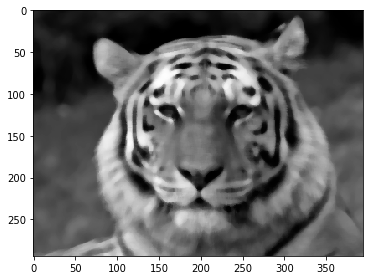

In [49]:
from skimage.io import imread, imsave, imshow
import numpy as np


def median(kernel, mid):
    kernel2 = np.sort(kernel, axis=None)
    kernel[mid] = kernel2[mid]
    return kernel[mid]

def median_filter(image, size_kernel):
    
    mid = (size_kernel*size_kernel)//2
    size_filt = size_kernel*size_kernel
      
    i_width, i_height = image.shape[0], image.shape[1]
    k_width, k_height = size_kernel, size_kernel
    
    i_width_o = i_width - k_width + 1
    i_height_o = i_height - k_height + 1

    s = (i_width_o, i_height_o)
    
    filtered = np.zeros(s, dtype=np.uint8)

        # Iterate over each (x, y) pixel in the image ...
    for y in range(i_height_o):
        for x in range(i_width_o):

            weighted_pixel = 0
            
            xs = np.array([])
            
            xs = image[x:x+k_width, y:y+k_height].reshape(size_filt)
            
            filtered[x, y] = median(xs, mid)

    return filtered


img = imread('images/tiger-gray-small.png')

img_g = median_filter(img, 7)

img_g = np.ndarray.astype(img_g, np.uint8)

imsave("images/out_img.png", img_g)

imshow(img_g)
